In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import sqlite3
import time

In [ ]:
conn = sqlite3.connect('data.db')
curs = conn.cursor()

query = "SELECT * from data WHERE END_DEVICE_NAME = 'PAI' and DATE_CREATED > date('2023-11-14 20:00') order by date_created"
curs.execute(query)

results = curs.fetchall()
result_dict = []

for row in results:
  row_dict = {}
  for i, col in enumerate(curs.description):
    row_dict[col[0]] = row[i]
  result_dict.append(row_dict)

conn.commit()
conn.close()

for data in result_dict:
  print(data)
  break

## transforma pra pandas
df = pd.DataFrame(result_dict)

{'ID_DATA': 29, 'END_DEVICE_NAME': 'PAI', 'DTYPE': 'Turbidez', 'VALUE': 8.61, 'DATE_CREATED': '2023-11-14 18:51:58'}


In [ ]:
df.to_csv("outSensorData.csv", header=True)

In [ ]:
df.head(10)

,ID_DATA,END_DEVICE_NAME,DTYPE,VALUE,DATE_CREATED
0,29,PAI,Turbidez,8.61,2023-11-14 18:51:58
1,30,PAI,PH,8.87,2023-11-14 18:52:05
2,31,PAI,Temperatura,50.00,2023-11-14 18:52:12
3,32,PAI,TDS,17.73,2023-11-14 18:52:19
4,33,PAI,Condutividade,25.65,2023-11-14 18:52:26
5,34,PAI,Turbidez,8.61,2023-11-14 18:52:58
6,35,PAI,PH,8.87,2023-11-14 18:53:06
7,36,PAI,Temperatura,50.00,2023-11-14 18:53:13
8,37,PAI,TDS,17.74,2023-11-14 18:53:20
9,38,PAI,Condutividade,25.75,2023-11-14 18:53:27


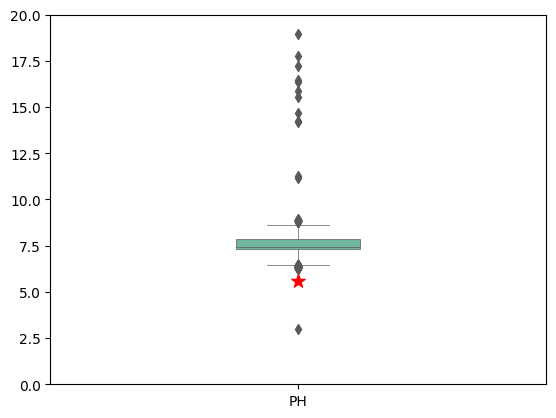

In [ ]:
ansPH = df.loc[df['DTYPE'] == 'PH', 'VALUE'].values
len(ansPH)

fig, ax = plt.subplots()

#df['hue'] = df['DTYPE'] == 'PH'
#ansPlot = ax.boxplot([ansPH], vert=True, patch_artist = False, notch ='True')
sbs.boxplot(data = [ansPH],
                  linewidth=0.5, palette = "Set2", width=0.25)
#ax.boxplot(ansPH)
#ax.plot([1], [5.57], 'ro')
ax.scatter(0, 5.57, color='red',marker='*',s=100)

ax.set_xticklabels(['PH'])
ax.set_ylim([0, 20])
plt.show()

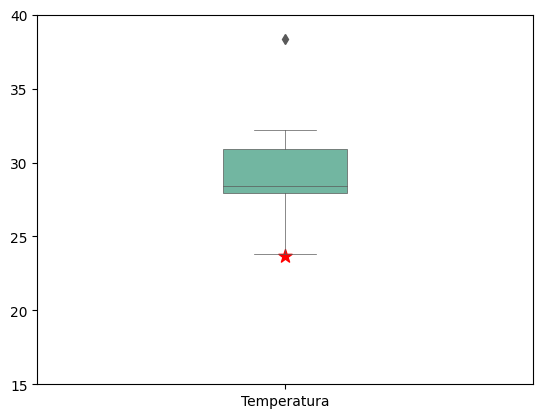

In [ ]:
ansTemperatura = df.loc[df['DTYPE'] == 'Temperatura', 'VALUE'].values
len(ansTemperatura)

fig, ax = plt.subplots()

sbs.boxplot(data = [ansTemperatura],
                  linewidth=0.5, palette = "Set2", width=0.25)
ax.scatter(0, 23.7, color='red',marker='*',s=100)

ax.set_xticklabels(['Temperatura'])
ax.set_ylim([15, 40])
plt.show()

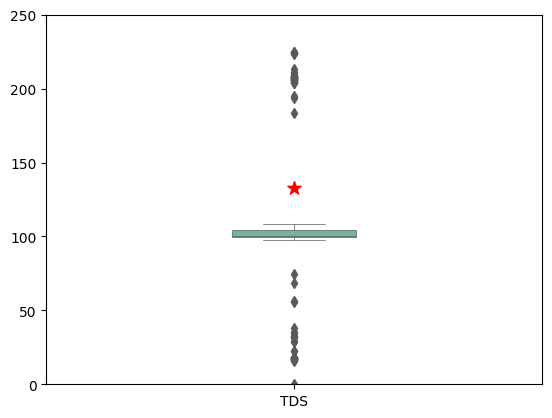

In [ ]:
ansTDS = df.loc[df['DTYPE'] == 'TDS', 'VALUE'].values
len(ansTDS)

fig, ax = plt.subplots()

sbs.boxplot(data = [ansTDS],
                  linewidth=0.5, palette = "Set2", width=0.25)
ax.scatter(0, 133.0, color='red',marker='*',s=100)

ax.set_xticklabels(['TDS'])
ax.set_ylim([0, 250])
plt.show()

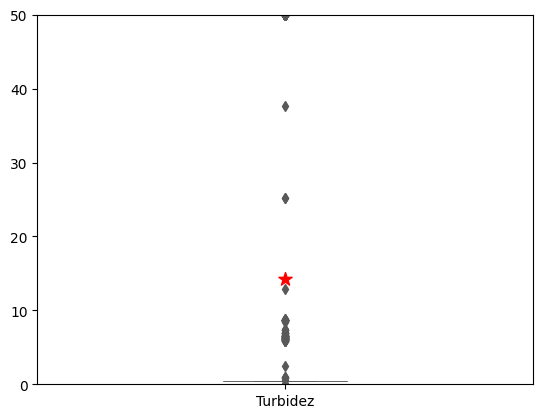

In [ ]:
ansTurbidez = df.loc[df['DTYPE'] == 'Turbidez', 'VALUE'].values
len(ansTurbidez)

fig, ax = plt.subplots()

sbs.boxplot(data = [ansTurbidez],
                  linewidth=0.5, palette = "Set2", width=0.25)
ax.scatter(0, 14.3, color='red',marker='*',s=100)

ax.set_xticklabels(['Turbidez'])
ax.set_ylim([0, 50])
plt.show()

In [ ]:
print(ansTurbidez.mean())
print(ansTurbidez.var())
print(ansTurbidez.std())

2.9455962441314547
103.95119854120657
10.195646058058633


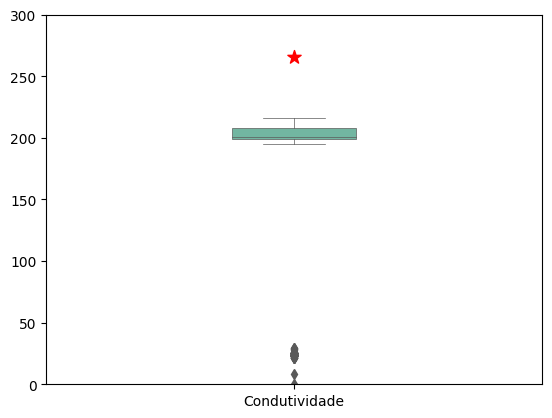

In [ ]:
ansCondutividade = df.loc[df['DTYPE'] == 'Condutividade', 'VALUE'].values
len(ansCondutividade)

fig, ax = plt.subplots()

sbs.boxplot(data = [ansCondutividade],
                  linewidth=0.5, palette = "Set2", width=0.25)
ax.scatter(0, 266.0, color='red',marker='*',s=100)

ax.set_xticklabels(['Condutividade'])
ax.set_ylim([0, 300])
plt.show()

In [ ]:
tipos = ['PH', 'Temperatura']
df_temp_ph = df[df['DTYPE'].isin(tipos)]

grouped = df_temp_ph.groupby(['DTYPE', 'DATE_CREATED'])['VALUE'].agg(['mean', 'std'])
grouped = grouped.reset_index()
grouped

,DTYPE,DATE_CREATED,mean,std
0,PH,2023-11-14 18:52:05,8.87,NaN
1,PH,2023-11-14 18:53:06,8.87,NaN
2,PH,2023-11-14 18:54:35,8.91,NaN
3,PH,2023-11-14 18:55:36,8.80,NaN
4,PH,2023-11-14 18:56:36,8.88,NaN
...,...,...,...,...
4247,Temperatura,2023-11-16 03:47:17,29.64,NaN
4248,Temperatura,2023-11-16 03:57:53,29.69,NaN
4249,Temperatura,2023-11-16 04:08:30,29.46,NaN
4250,Temperatura,2023-11-16 04:19:18,29.53,NaN


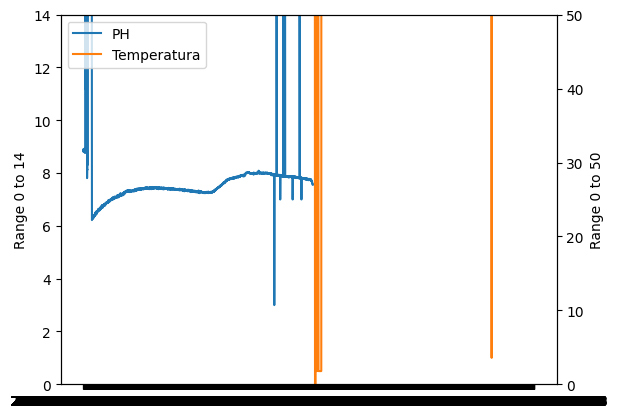

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for tipo in grouped['DTYPE'].unique():
  data = grouped[grouped['DTYPE'] == tipo]
  ax1.plot(data['DATE_CREATED'], data['mean'], label=tipo)
  ax1.fill_between(data['DATE_CREATED'], data['mean'] - data['std'], data['mean'] + data['std'], alpha=0.2)

ax1.set_ylim([0, 14])
ax1.set_ylabel('Range 0 to 14')
ax2.set_ylim([0, 50])
ax2.set_ylabel('Range 0 to 50')

ax1.legend(loc='upper left')
plt.show()


In [ ]:
from scipy import stats

## use:
##  zscore
##  IQR
METODO_OUTLIER = 'zscore'

df['DATE_CREATED'] = pd.to_datetime(df['DATE_CREATED'])

condition = df['DATE_CREATED'] > '2023-11-14 20:00:00'
df_filtered = df[condition]

df_PH = df_filtered[df_filtered['DTYPE'] == 'PH']
df_TEMPERATURE = df_filtered[df_filtered['DTYPE'] == 'Temperatura']

print('Tamanho dataframes: ', len(df_PH), ' ', len(df_TEMPERATURE))
print('------------')

if METODO_OUTLIER == 'zscore':
  ## remove outliers usando Z-score
  z_scores_PH = np.abs(stats.zscore(df_PH['VALUE']))
  z_scores_TEMPERATURE = np.abs(stats.zscore(df_TEMPERATURE['VALUE']))

  # Remove outliers
  df_PH = df_PH[z_scores_PH < 3]
  df_TEMPERATURE = df_TEMPERATURE[z_scores_TEMPERATURE < 3]
elif METODO_OUTLIER == 'IQR':
  ## remove outliers usando IQR (via boxplot)
  Q1_PH = df_PH['VALUE'].quantile(0.25)
  Q3_PH = df_PH['VALUE'].quantile(0.75)
  IQR_PH = Q3_PH - Q1_PH

  Q1_TEMPERATURE = df_TEMPERATURE['VALUE'].quantile(0.25)
  Q3_TEMPERATURE = df_TEMPERATURE['VALUE'].quantile(0.75)
  IQR_TEMPERATURE = Q3_TEMPERATURE - Q1_TEMPERATURE

  df_PH = df_PH[~((df_PH['VALUE'] < (Q1_PH - 1.5 * IQR_PH)) |(df_PH['VALUE'] > (Q3_PH + 1.5 * IQR_PH)))]
  df_TEMPERATURE = df_TEMPERATURE[~((df_TEMPERATURE['VALUE'] < (Q1_TEMPERATURE - 1.5 * IQR_TEMPERATURE)) |(df_TEMPERATURE['VALUE'] > (Q3_TEMPERATURE + 1.5 * IQR_TEMPERATURE)))]
else:
  print('*********** no outlier method applied! ***********')
  exit(1)

## calc medias e desvio padrao
mean_PH = df_PH.groupby('DATE_CREATED')['VALUE'].mean()
std_PH = df_PH['VALUE'].std()

mean_TEMPERATURE = df_TEMPERATURE.groupby('DATE_CREATED')['VALUE'].mean()
std_TEMPERATURE = df_TEMPERATURE['VALUE'].std()

print('Após remocao de outliers')
print('Tamanho dataframes: ', len(df_PH), ' ', len(df_TEMPERATURE))
print('------------')
print(len(mean_TEMPERATURE), std_TEMPERATURE)
print('------------')
print(len(mean_PH), std_PH)

Tamanho dataframes:  2142   2064
------------
Após remocao de outliers
Tamanho dataframes:  2102   2006
------------
2006 1.7770195772786217
------------
2102 1.2580620767293853


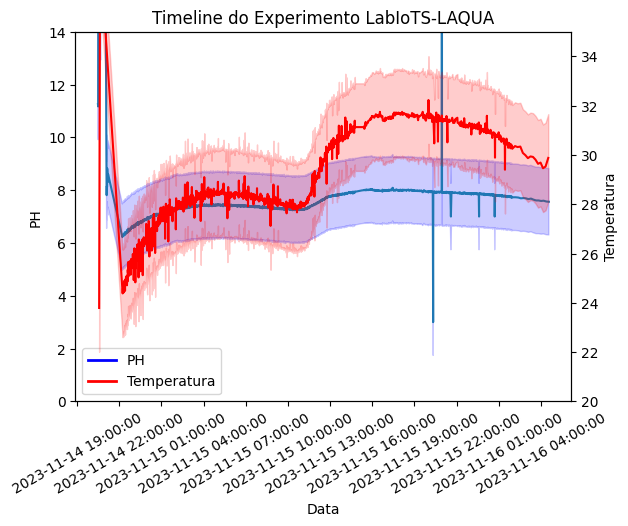

In [ ]:
from matplotlib.dates import HourLocator, DateFormatter, date2num
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

fig, ax1 = plt.subplots()

# 'PH'
ax1.plot(mean_PH.index, mean_PH.values, label='PH')
ax1.fill_between(mean_PH.index, mean_PH.values - std_PH, mean_PH.values + std_PH, alpha=0.2,
                 color='blue')
ax1.set_ylim([0, 14])

# Create a second y-axis and plot 'TEMPERATURE' values
ax2 = ax1.twinx()
ax2.plot(mean_TEMPERATURE.index, mean_TEMPERATURE.values, label='Temperatura', color='r')
ax2.fill_between(mean_TEMPERATURE.index, mean_TEMPERATURE.values - std_TEMPERATURE, mean_TEMPERATURE.values + std_TEMPERATURE, alpha=0.2,
                 color='red')
ax2.set_ylim([20, 35])

ax1.set_xlabel('Data')
ax1.set_ylabel('PH')
ax2.set_ylabel('Temperatura')
plt.title('Timeline do Experimento LabIoTS-LAQUA')

# Set the x-ticks to be every 4 hours
locator = HourLocator(interval=3)
ax1.xaxis.set_major_locator(locator)

# Format the date and time on the x-axis
formatter = DateFormatter('%Y-%m-%d %H:%M:%S')
ax1.xaxis.set_major_formatter(formatter)

# Rotate x-axis labels
for tick in ax1.get_xticklabels():
   tick.set_rotation(30)

legend_elements = [Line2D([0], [0], color='blue', lw=2, label='PH'),
                 Line2D([0], [0], color='red', lw=2, label='Temperatura')]
ax1.legend(handles=legend_elements, loc='best')

# Show the plot
plt.show()


In [ ]:
df_PH

,ID_DATA,END_DEVICE_NAME,DTYPE,VALUE,DATE_CREATED
116,145,PAI,PH,11.26,2023-11-14 20:29:35
121,150,PAI,PH,11.17,2023-11-14 20:30:34
126,155,PAI,PH,18.96,2023-11-14 20:31:34
131,160,PAI,PH,17.23,2023-11-14 20:32:35
136,165,PAI,PH,17.75,2023-11-14 20:34:36
...,...,...,...,...,...
10609,10638,PAI,PH,7.61,2023-11-16 03:49:25
10614,10643,PAI,PH,7.59,2023-11-16 04:00:02
10619,10648,PAI,PH,7.60,2023-11-16 04:10:50
10624,10653,PAI,PH,7.57,2023-11-16 04:22:19
